Image


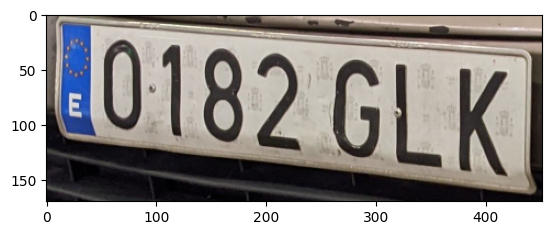

Hue


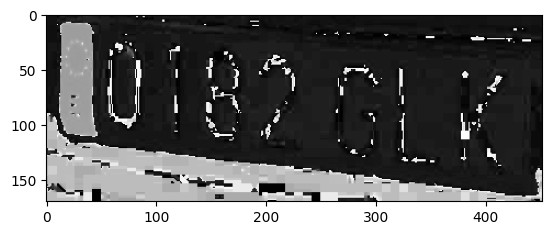

High Saturation area


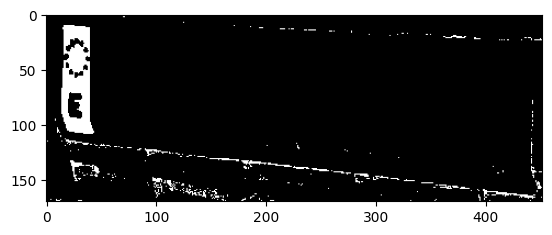

High Saturation Hue


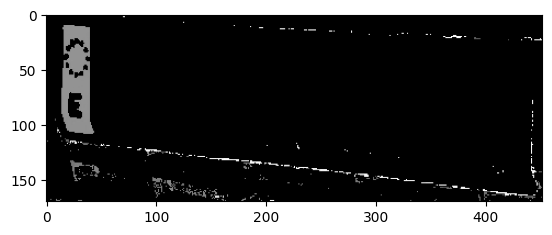

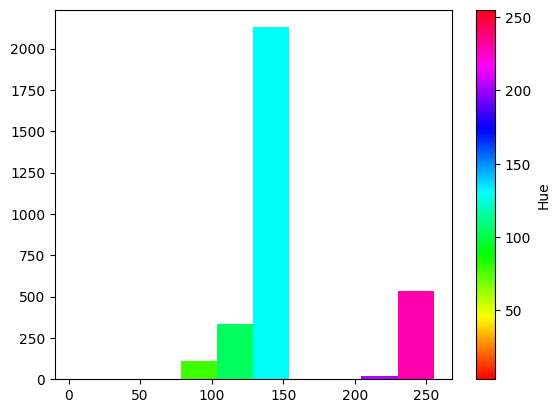

Rate: 0.027706923477355545
Value


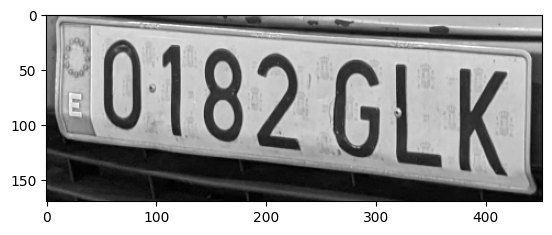

Image


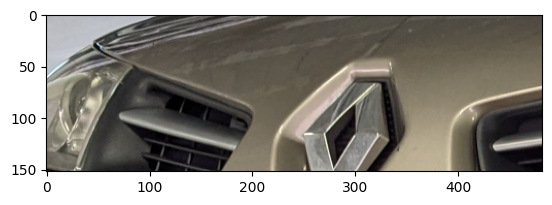

Hue


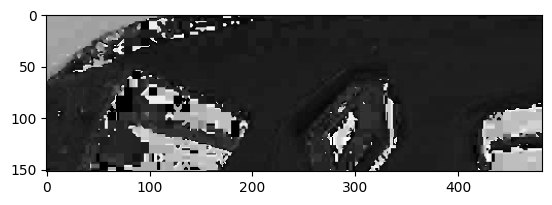

High Saturation area


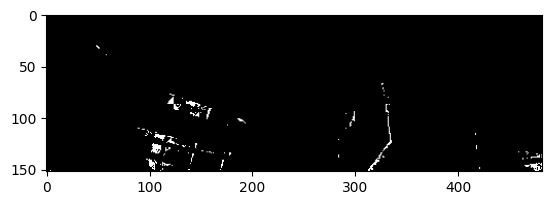

High Saturation Hue


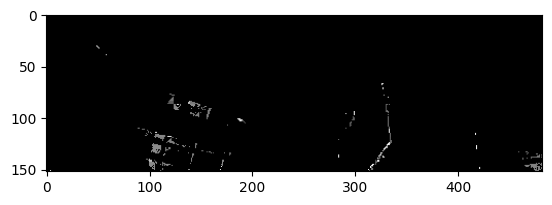

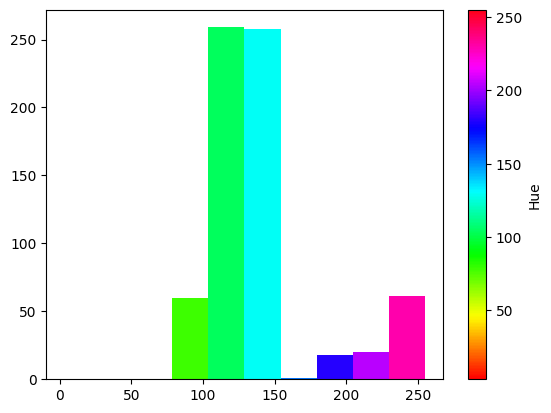

Rate: 0.0035215112469971607
Value


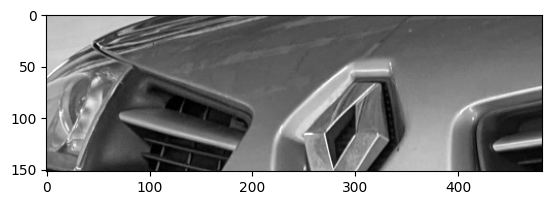

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

path = "."

for file in ["blue1.png", "blue2.png"]:

    image = cv2.imread(file)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    _, high_saturation_area = cv2.threshold(image_hsv[:,:,1], 150,255, cv2.THRESH_BINARY)
    
    high_saturation_hue = high_saturation_area*image_hsv[:,:,0]
    
    print("Image")
    plt.imshow(image_rgb)
    plt.show()
    
    print("Hue")
    plt.imshow(image_hsv[:,:,0], cmap='gray')
    plt.show()
    
    print("High Saturation area")
    plt.imshow(high_saturation_area, cmap='gray')
    plt.show()
    
    print("High Saturation Hue")
    plt.imshow(high_saturation_hue, cmap='gray')
    plt.show()
    
    cmap = plt.cm.hsv
    norm = mcolors.Normalize(vmin=3, vmax=255)

    # Plot the histogram
    hist_values, bins, patches = plt.hist(high_saturation_hue.flatten(), bins=10, range=(3, 255))

    # Apply colormap to the patches
    for patch, bin_val in zip(patches, bins):
        color = cmap(norm(bin_val))  # Get the color from the colormap
        patch.set_facecolor(color)  # Apply the color to each bar

    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Hue')  # Add a color bar to show the mapping
    plt.show()
    
    pixels = image.shape[0]*image.shape[1]
    rate = hist_values[5] / pixels
    print("Rate:", rate)
    
    print("Value")
    plt.imshow(image_hsv[:,:,2], cmap='gray')
    plt.show()